In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

In [2]:
#用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [3]:
#定义加载数据的文件名
filename = "anjuke-m1015.csv"

In [4]:
#自定义数据的行列索引（行索引使用pd默认的，列索引使用自定义的）
names = [
        "house_name","house_type","house_zone","house_address","price","house_area","house_location",
        ]

In [5]:
#自定义需要处理的缺失值标记列表
miss_value = ["null","暂无数据"]
#数据类型会自动转换
#使用自定义的列名，跳过文件中的头行，处理缺失值列表标记的缺失值
df1 = pd.read_csv(filename,skiprows=[0],names=names,na_values=miss_value,encoding='gbk') #skiprows=[0]， 跳过文件中的头行
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
house_name        1092 non-null object
house_type        1092 non-null object
house_zone        1092 non-null object
house_address     1092 non-null object
price             1092 non-null int64
house_area        1092 non-null float64
house_location    1092 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 59.8+ KB
None


In [6]:
df1.describe()

,price,house_area
count,1092.000000,1092.000000
mean,1382.131868,96.129853
std,969.370089,67.618662
min,260.000000,10.000000
25%,1000.000000,70.000000
50%,1300.000000,96.000000
75%,1600.000000,120.000000
max,25000.000000,1500.000000


In [7]:
#都匀主要小区房源数量及均价
# 根据地区分组
detail_place=df1.groupby("house_zone")
house_com=detail_place.price.agg(['mean','count'])
# 重置索引，根据count排序取前20项
house_com.reset_index(inplace=True)
house_com_main=house_com.sort_values('count',ascending=False).head(15)


In [8]:
house_com_main

,house_zone,mean,count
30,伯爵花园,1392.945946,74
177,马鞍山小区林馨佳苑,1561.176471,34
111,水岸铭门,1157.692308,26
81,平惠小区,950.000000,20
20,中鑫大厦,970.500000,20
132,碧桂园滨江一号,2257.500000,20
183,黔中公寓,1486.842105,19
73,尚城壹品,1397.222222,18
92,御庭苑,1426.666667,15
66,城市风景,1596.666667,15


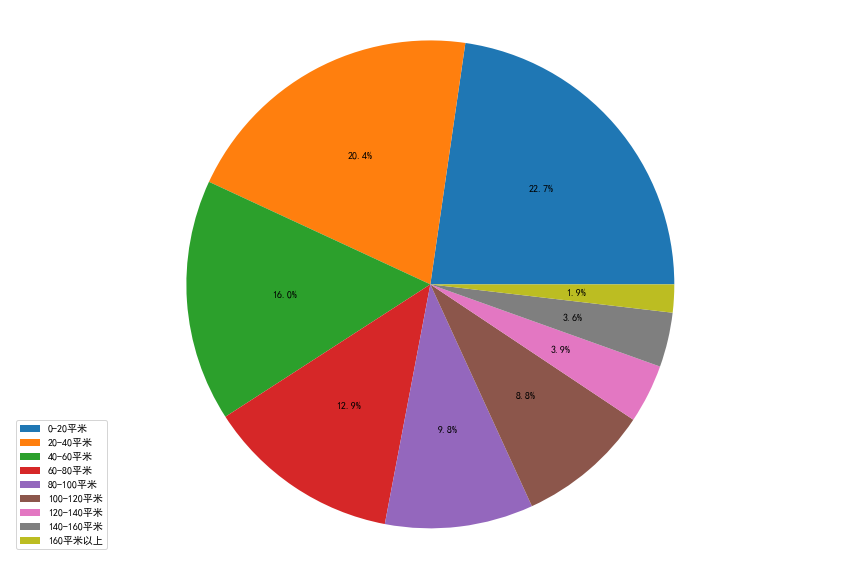

In [9]:
meters_info=df1["house_area"]
bins = [0,20,40,60,80,100,120,140,160,200]
labels= ["0-20平米",'20-40平米','40-60平米','60-80平米','80-100平米','100-120平米','120-140平米','140-160平米','160平米以上']
meters_stage=pd.cut(meters_info,bins=bins,labels=labels)
fig = plt.figure(figsize=(15,10))

plt.pie(meters_stage.value_counts().values,autopct='%1.1f%%',shadow=False)
plt.axis('equal')
plt.legend(loc="lower left", labels=labels,bbox_to_anchor=(0,0))
###plt.title("房屋面积的分布")
plt.show()
fig.savefig('图7出租房面积分布饼图2.png')                
fig.savefig('图7出租房面积分布饼图2.pdf')

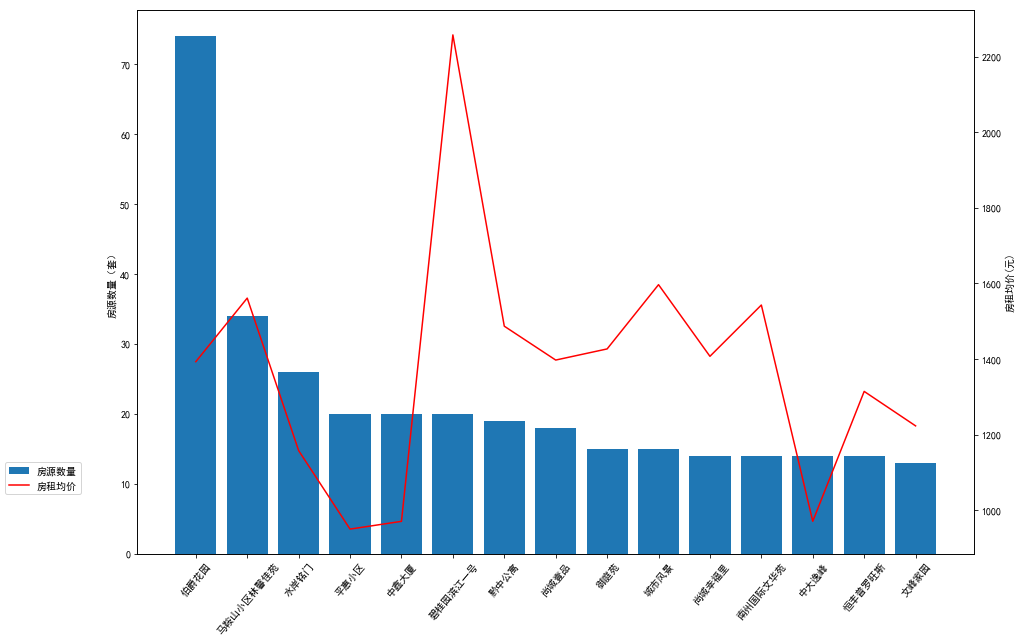

In [12]:
#都匀主要小区房源数量及均价
# 根据地区分组
detail_place=df1.groupby("house_zone")
house_com=detail_place.price.agg(['mean','count'])
# 重置索引，根据count排序取前20项
house_com.reset_index(inplace=True)
house_com_main=house_com.sort_values('count',ascending=False).head(15)


x=house_com_main["house_zone"].values
y1=house_com_main['count'].values
y2=house_com_main['mean'].values

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(111)
ax1.bar(x, y1,label="房源数量")
ax1.set_ylabel('房源数量（套）')
# ax1.set_title("杭州主要区域房源数量及均价")
# ax1.legend(["房源数量"])

plt.xticks(rotation=50)
ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'r',label="房租均价")
ax2.set_ylabel("房租均价(元)")
fig.legend(bbox_to_anchor=(0,0.2),loc='lower left')
###plt.title("都匀热门小区房源数量及均价")
plt.show()
fig.savefig('图3都匀热门小区租房每月均价与房源数量.png')
plt.show()                 
fig.savefig('图3都匀热门小区租房每月均价与房源数量.pdf')


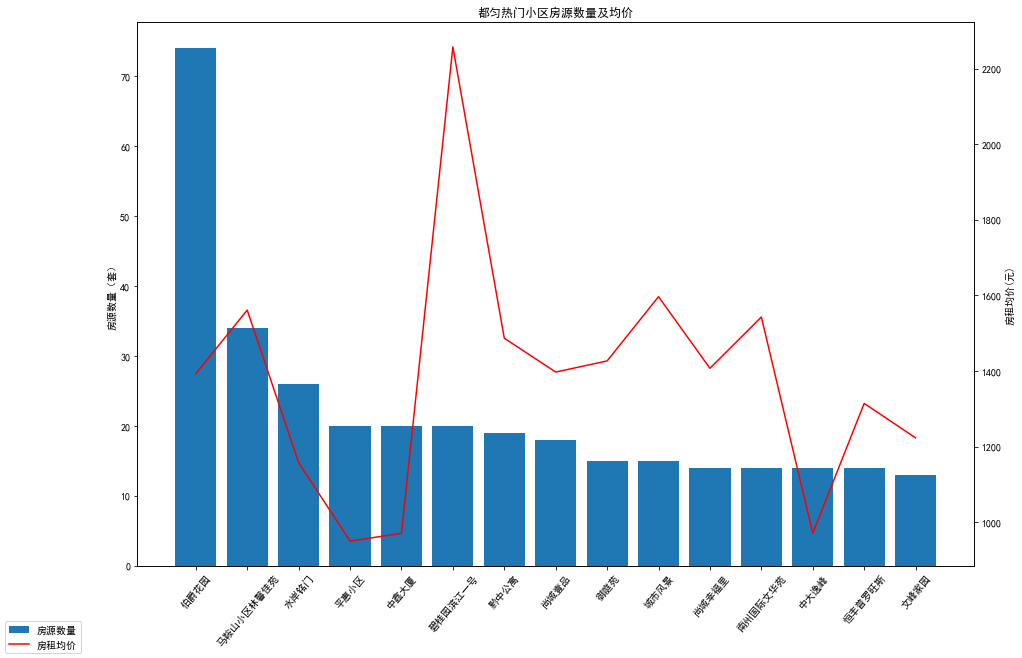

In [50]:
#都匀主要小区房源数量及均价
# 根据地区分组
detail_place=df1.groupby("house_zone")
house_com=detail_place.price.agg(['mean','count'])
# 重置索引，根据count排序取前20项
house_com.reset_index(inplace=True)
house_com_main=house_com.sort_values('count',ascending=False).head(15)


x=house_com_main["house_zone"].values
y1=house_com_main['count'].values
y2=house_com_main['mean'].values

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(111)
ax1.bar(x, y1,label="房源数量")
ax1.set_ylabel('房源数量（套）')
# ax1.set_title("杭州主要区域房源数量及均价")
# ax1.legend(["房源数量"])

plt.xticks(rotation=50)
ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'r',label="房租均价")
ax2.set_ylabel("房租均价(元)")
fig.legend(loc='lower left')
plt.title("都匀热门小区房源数量及均价")
plt.show()
fig.savefig('图3都匀热门小区租房每月均价与房源数量.png')
plt.show()                 
fig.savefig('图3都匀热门小区租房每月均价与房源数量.pdf')


价格区间与房源数量的关系

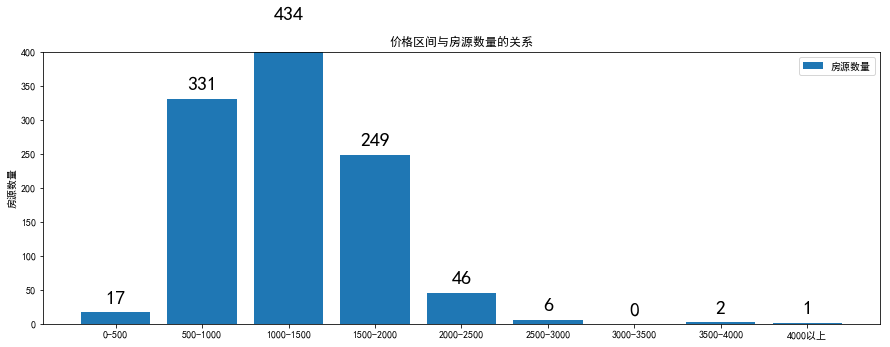

In [51]:
price_info=df1["price"]
bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500]
labels= ["0-500",'500-1000','1000-1500','1500-2000','2000-2500','2500-3000','3000-3500','3500-4000','4000以上']
price_stage=pd.cut(price_info,bins=bins,labels=labels).value_counts().sort_index()
plt.figure(figsize=(15,5))
plt.bar(price_stage.index, price_stage.values,label="房源数量")
plt.ylim(0,400)
plt.ylabel('房源数量')
for a,b in zip(price_stage.index,price_stage.values):
    plt.text(a, b+10, '%.0f' % b, ha='center', va= 'bottom',fontsize=20)
plt.legend()
plt.title("价格区间与房源数量的关系")
plt.show()

 由上图可以看出均价在3000左右的房源较多，价格在500以下或2500以上的房源很少

房屋面积的分布

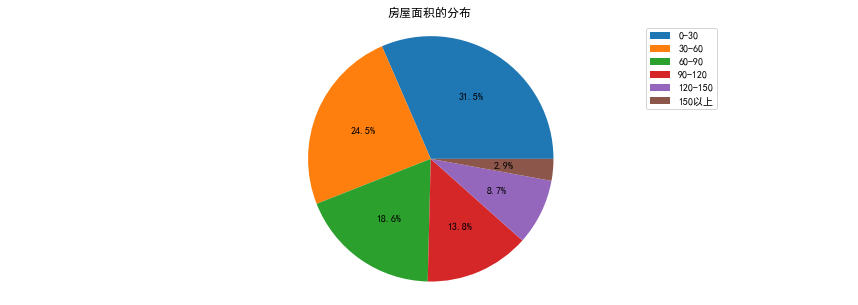

In [52]:
meters_info=df1["house_area"]
bins = [0,30,60,90,120,150,200]
labels= ["0-30",'30-60','60-90','90-120','120-150','150以上']
meters_stage=pd.cut(meters_info,bins=bins,labels=labels)

plt.figure(figsize=(15,5))
plt.pie(meters_stage.value_counts().values,autopct='%1.1f%%',shadow=False)
plt.axis('equal')
plt.legend(loc="best", labels=labels,bbox_to_anchor=(0.85,1))
plt.title("房屋面积的分布")
plt.show()

由上图可看出，大约80%的房源的面积集中在0-90平方米之间，大面积的房屋很少

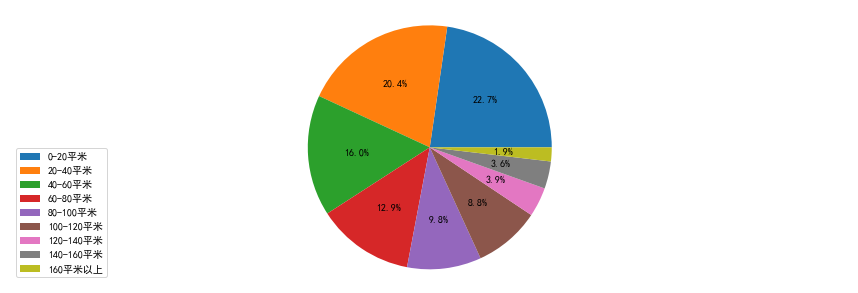

In [53]:
meters_info=df1["house_area"]
bins = [0,20,40,60,80,100,120,140,160,200]
labels= ["0-20平米",'20-40平米','40-60平米','60-80平米','80-100平米','100-120平米','120-140平米','140-160平米','160平米以上']
meters_stage=pd.cut(meters_info,bins=bins,labels=labels)

plt.figure(figsize=(15,5))
plt.pie(meters_stage.value_counts().values,autopct='%1.1f%%',shadow=False)
plt.axis('equal')
plt.legend(loc="lower left", labels=labels,bbox_to_anchor=(0,0))
###plt.title("房屋面积的分布")
plt.show()
fig.savefig('图2出租房面积分布饼图2.png')                
fig.savefig('图2出租房面积分布饼图2.pdf')

房屋面积与价格

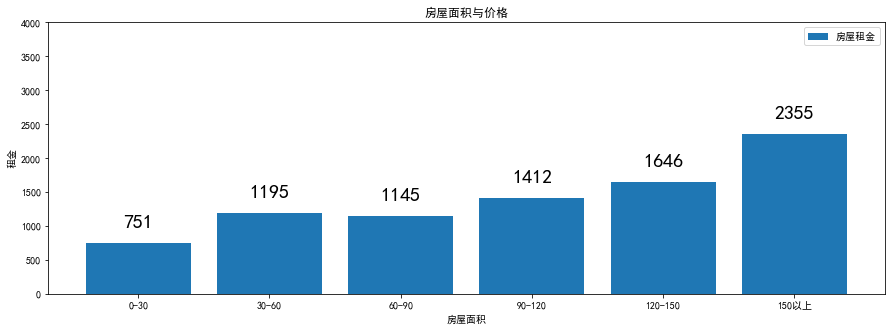

In [20]:
meters_info=df1["house_area"]
bins = [0,30,60,90,120,150,200]
labels= ["0-30",'30-60','60-90','90-120','120-150','150以上']

df1["house_area_level"]=pd.cut(meters_info,bins=bins,labels=labels)
meters_data=df1[["house_area_level","price"]]
peices=meters_data.groupby("house_area_level").mean().reset_index()
plt.figure(figsize=(15,5))
plt.bar(peices.house_area_level, peices.price,label="房屋租金")
plt.ylabel('租金')
plt.ylim(0,4000)
plt.xlabel('房屋面积')
for a,b in zip(peices.house_area_level,peices.price):
    plt.text(a, b+200, '%.0f' % b, ha='center', va= 'bottom',fontsize=20)
plt.legend()
plt.title("房屋面积与价格")
plt.show()

果然房子越大租金越贵